In [1]:
import numpy as np
%matplotlib inline
from pylab import *

from astropy import units as uu
from astropy import constants as cc

In [2]:
dat = np.loadtxt("s2n.dat")

In [3]:
f_l_units = uu.erg/uu.s/uu.angstrom/uu.cm**2

In [4]:
l,calibs = dat.T
l *= uu.angstrom
calibs = calibs/f_l_units/uu.s**0.5

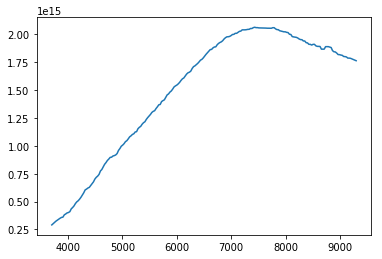

In [5]:
plot(l,calibs)

# Grasp of SEDM

In [6]:
# Obstruction: https://www.evernote.com/shard/s13/sh/e0686797-ef64-4b1c-b32f-c2f1bef9fd7d/59e86b4e9c3cd4426ce9164050187d0e

In [7]:
D_tel = 60 * uu.imperial.inch

A_tel = (np.pi*(D_tel/2)**2 - np.pi*(D_tel/2*.4)**2).cgs

In [8]:
spectral_res = 100
pixels_per_res = 2.4
lam = 6000 * uu.Angstrom

BW_per_pixel = lam/ spectral_res / pixels_per_res

In [9]:
A_tel

<Quantity 15322.83416791 cm2>

In [10]:
BW_per_pixel

<Quantity 25. Angstrom>

# Energy per photon

In [11]:
hc = cc.h * cc.c
epp = hc/lam

In [12]:
epp.cgs

<Quantity 3.31074304e-12 erg>

#  input at wavelength lam

In [33]:
f_l = 1 * f_l_units
exptime = 1*uu.s

In [34]:
f_l

<Quantity 1. erg / (Angstrom cm2 s)>

In [35]:
ix = np.argmin(np.abs(l - lam))
calib = calibs[ix]

### In the case where the input spectrum is not affected by loses I compute the number of photons received. This represents an ideal situation where there are not atmospheric, reflective, fresnel, or other loses

In [36]:
num_photon = (f_l * exptime * BW_per_pixel * A_tel / epp).cgs
num_photon

<Quantity 1.15705402e+17>

In [37]:
snr_ideal = np.sqrt(num_photon)
snr_ideal

<Quantity 3.40154968e+08>

### I now use the Nugent curve to estimate the measured SNR

In [38]:
measured_signal_to_noise = calib * f_l * (exptime)**.5

In [39]:
measured_signal_to_noise

<Quantity 1.5448951e+15>

In [40]:
print("QE is: %s" % (measured_signal_to_noise/snr_ideal))

QE is: 4541739.052597924


--> Clearly something is wrong ^^^^^

### Pretend units of the calibration curve are such that 
$S/N = (calib\ curv \cdot input\ spectrum \cdot exptime)^{.5}$

In [43]:
cv = calib.value / f_l_units / uu.s

In [45]:
measured_signal_to_noise_janky = np.sqrt(cv * f_l * uu.s)

In [47]:
print("Janky approach yields a QE of %s" % (measured_signal_to_noise_janky/snr_ideal))

Janky approach yields a QE of 0.11555072645465417
